In [1]:
import tensorflow as tf
import numpy as np
import config
import os

import matplotlib.pyplot as plt
%matplotlib inline

2026-01-16 15:22:20.481141: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-16 15:22:20.487976: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768576940.496059 1847186 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768576940.498419 1847186 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2026-01-16 15:22:20.506444: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

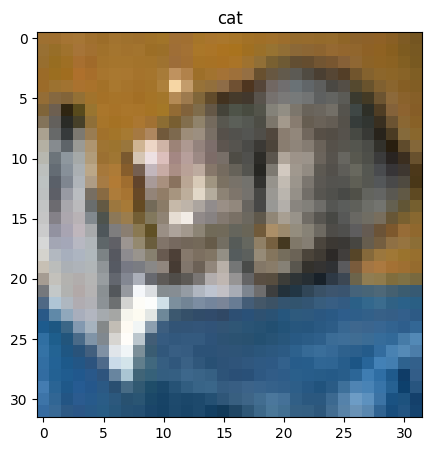

In [2]:
(training_images, training_labels) ,\
(validation_images, validation_labels) = \
tf.keras.datasets.cifar10.load_data()

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(5, 5))
plt.imshow(validation_images[0])
plt.title(f'{classes[validation_labels[0][0]]}')
#plt.axis('off')
plt.show()


=== Confronto Original vs Enhanced ===


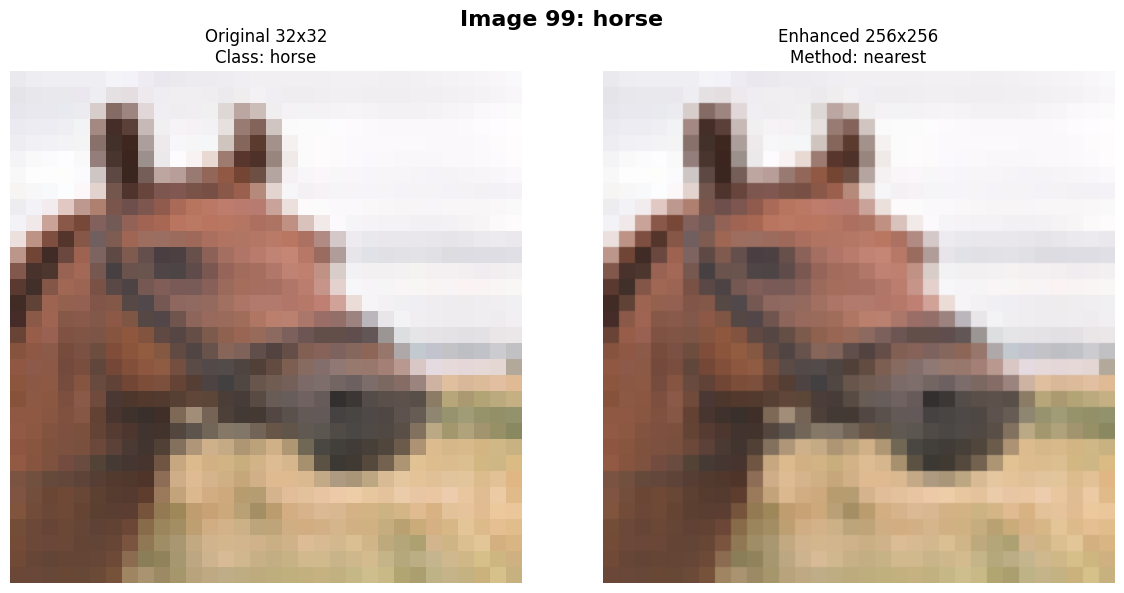

Original shape: (32, 32, 3)
Enhanced shape: (256, 256, 3)

=== Confronto metodi di enhancement ===


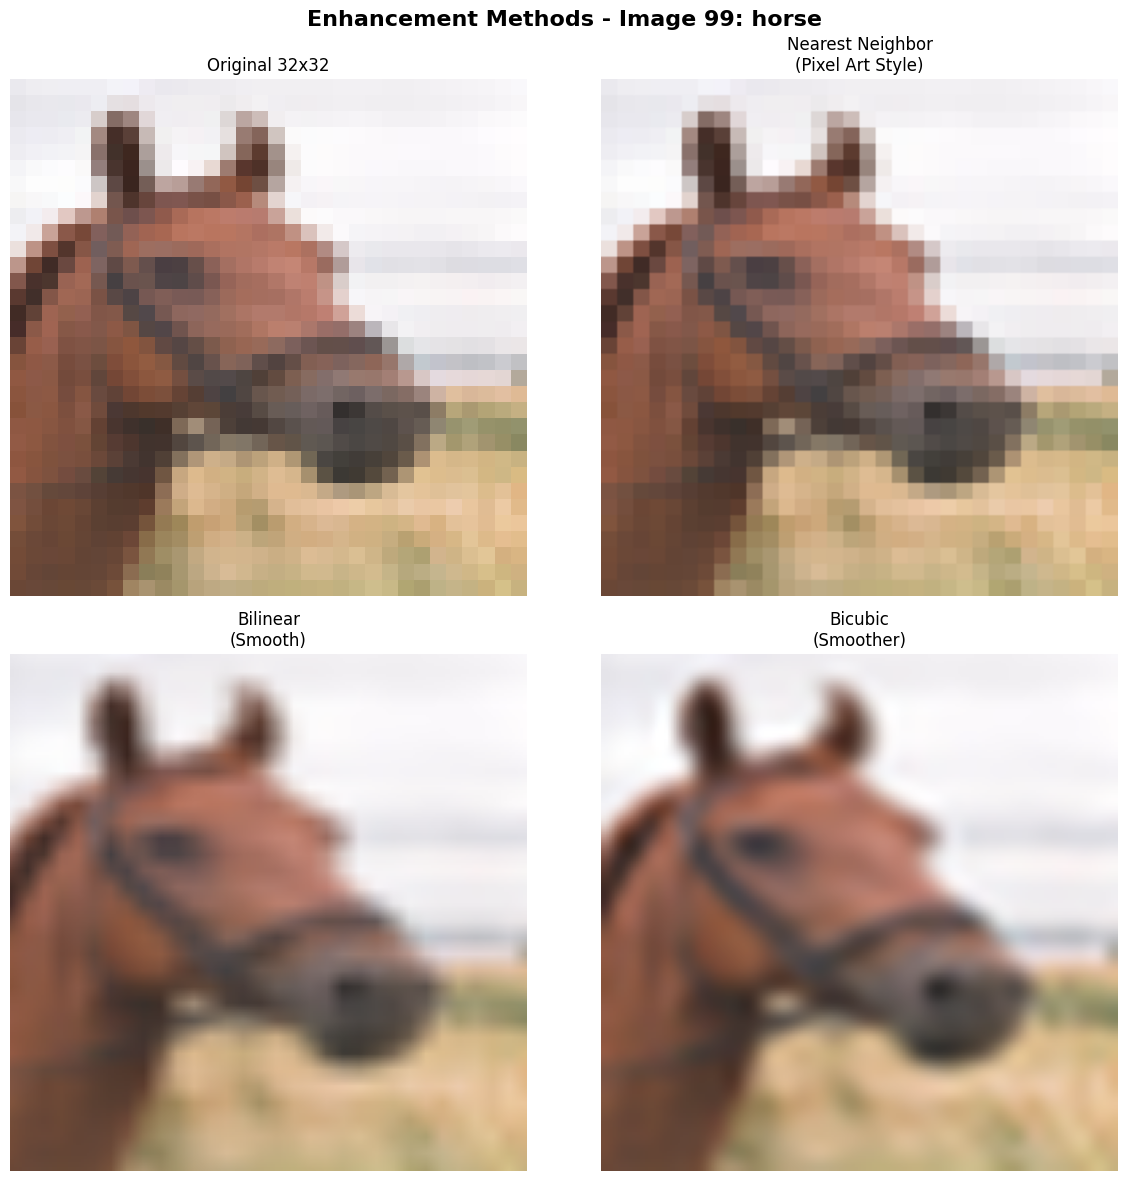

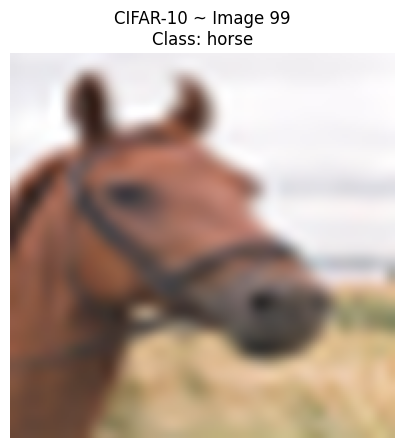


=== Super enhancement ===


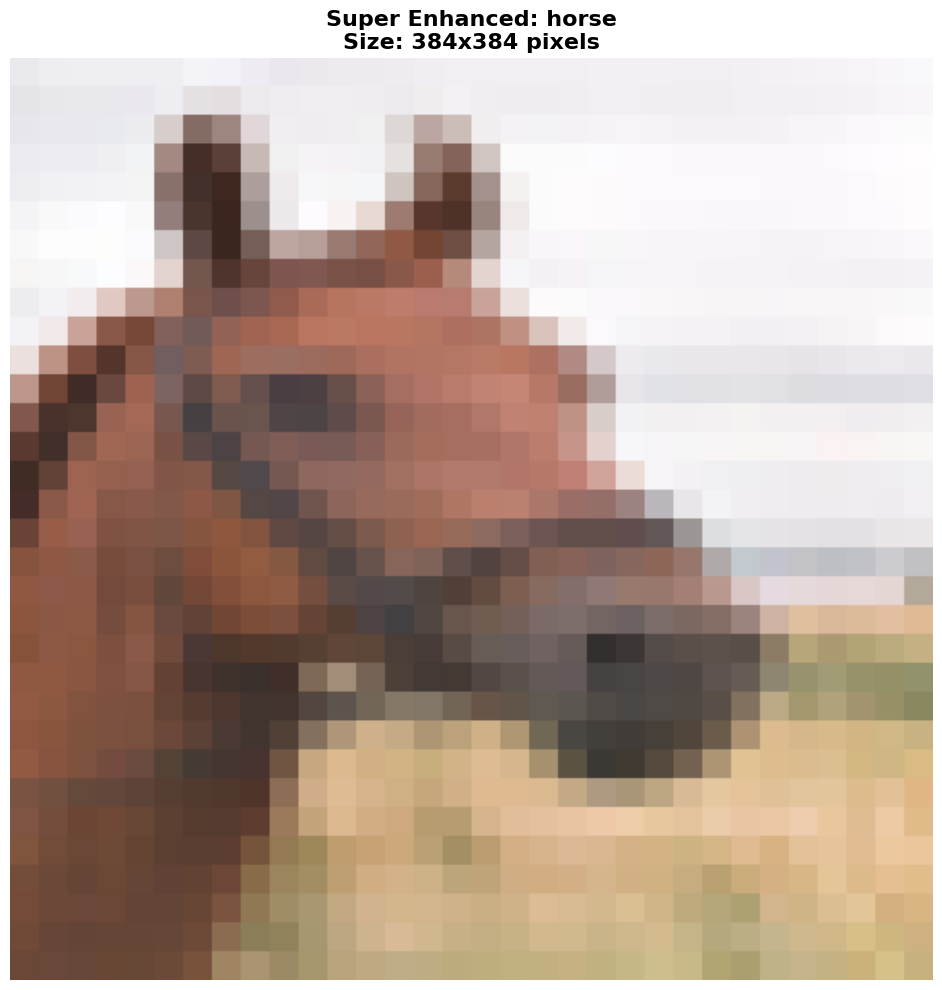

Super enhanced image - Class: horse
Original: (32, 32, 3) -> Enhanced: (384, 384, 3)

=== Griglia di immagini enhanced ===


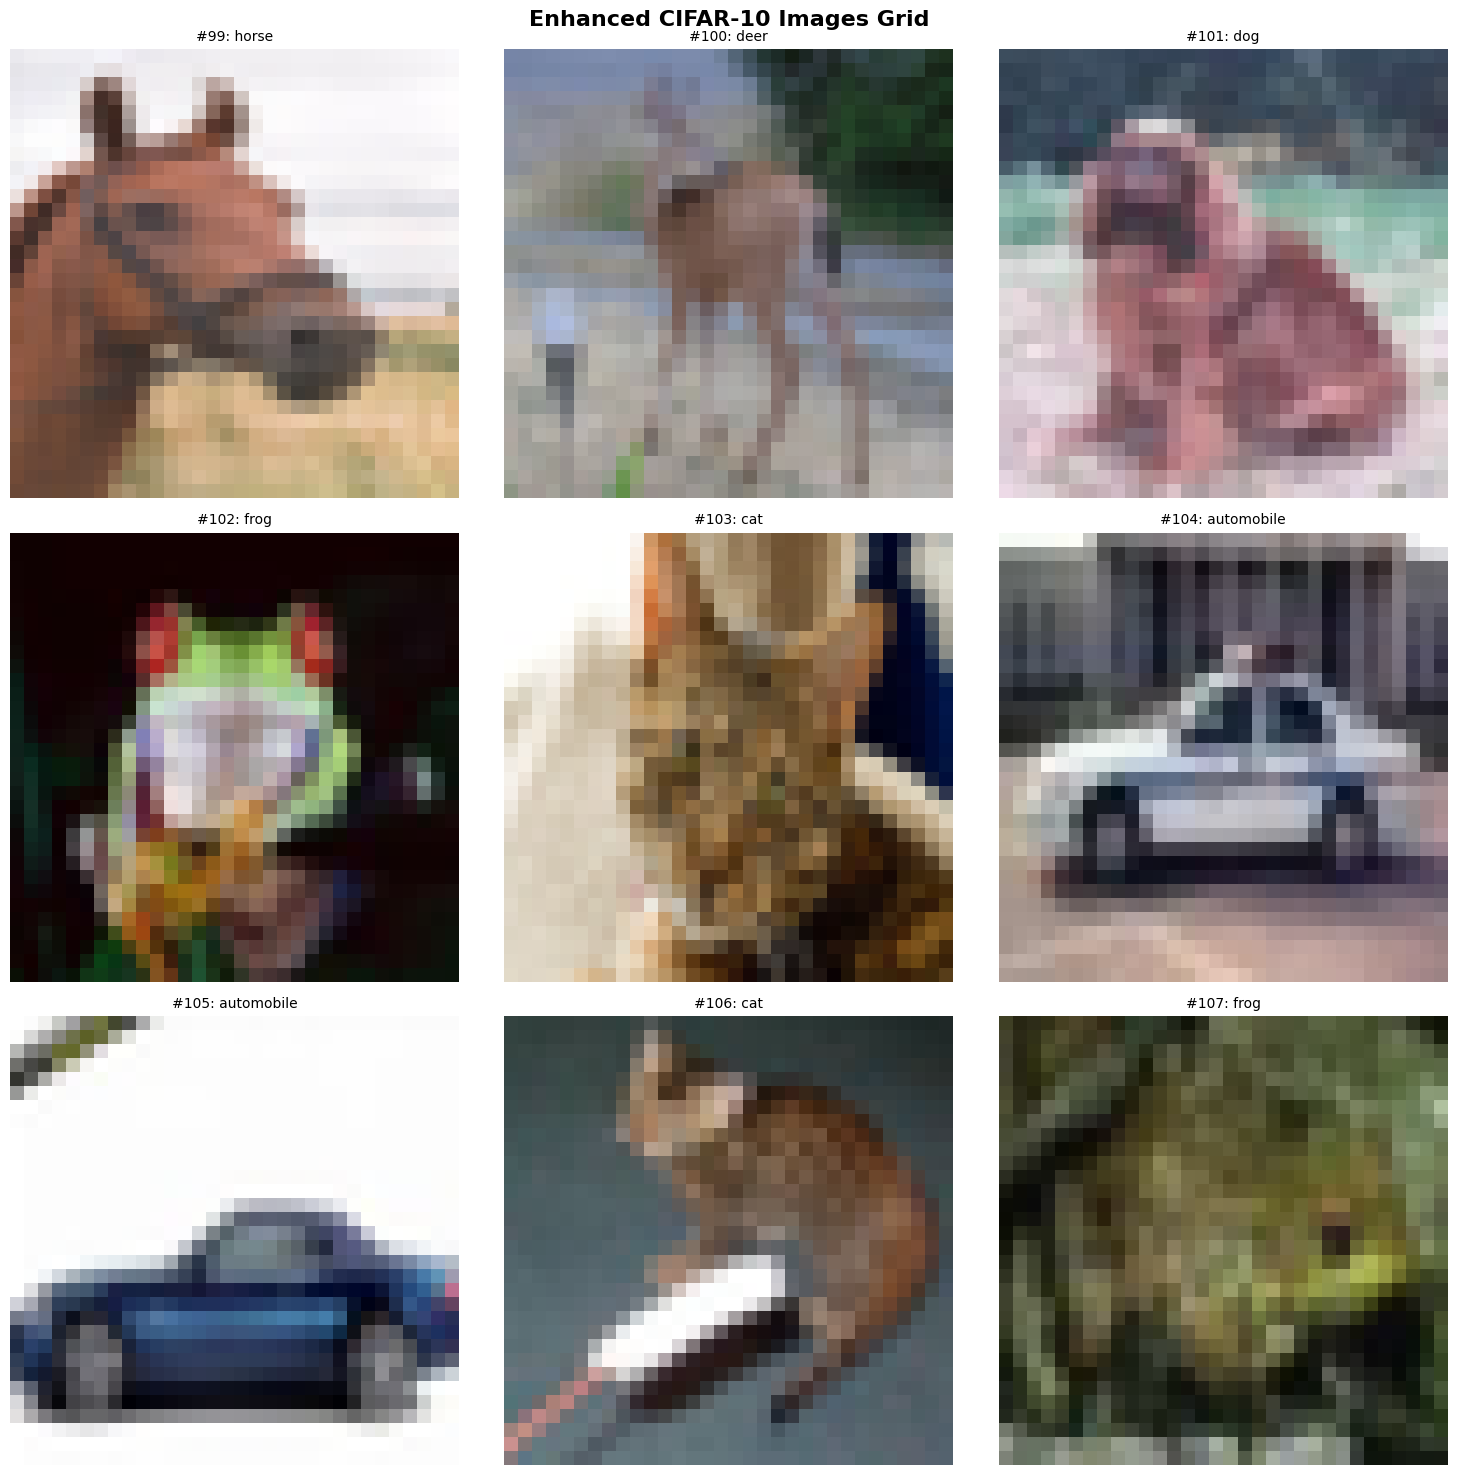

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import zoom
import cv2

# Carica il dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Nomi delle classi CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

def plot_enhanced_image(index=0, scale_factor=8, method='nearest'):
    """
    Plotta un'immagine CIFAR-10 ingrandita per migliorare la visibilità
    
    Args:
        index (int): Indice dell'immagine
        scale_factor (int): Fattore di scala (default: 8x = 256x256)
        method (str): Metodo di interpolazione ('nearest', 'bilinear', 'bicubic')
    """
    original_image = x_test[index]
    label = y_test[index][0]
    
    # Diversi metodi di scaling
    if method == 'nearest':
        # Nearest neighbor - mantiene pixel netti
        scaled_image = np.repeat(np.repeat(original_image, scale_factor, axis=0), scale_factor, axis=1)
    elif method == 'bilinear':
        # Bilinear interpolation - più smooth
        scaled_image = zoom(original_image, (scale_factor, scale_factor, 1), order=1)
    elif method == 'bicubic':
        # Bicubic interpolation - ancora più smooth
        scaled_image = zoom(original_image, (scale_factor, scale_factor, 1), order=3)
    
    # Assicurati che i valori siano nel range corretto
    scaled_image = np.clip(scaled_image, 0, 255).astype(np.uint8)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Immagine originale
    axes[0].imshow(original_image)
    axes[0].set_title(f'Original 32x32\nClass: {class_names[label]}', fontsize=12)
    axes[0].axis('off')
    
    # Immagine ingrandita
    axes[1].imshow(scaled_image)
    axes[1].set_title(f'Enhanced {32*scale_factor}x{32*scale_factor}\nMethod: {method}', fontsize=12)
    axes[1].axis('off')
    
    plt.suptitle(f'Image {index}: {class_names[label]}', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print(f"Original shape: {original_image.shape}")
    print(f"Enhanced shape: {scaled_image.shape}")

def plot_multiple_enhancement_methods(index=0):
    """
    Confronta diversi metodi di enhancement per la stessa immagine
    """
    original_image = x_test[index]
    label = y_test[index][0]
    scale_factor = 6
    
    # Diversi metodi di scaling
    nearest = np.repeat(np.repeat(original_image, scale_factor, axis=0), scale_factor, axis=1)
    bilinear = zoom(original_image, (scale_factor, scale_factor, 1), order=1)
    bicubic = zoom(original_image, (scale_factor, scale_factor, 1), order=3)
    
    # Assicura range corretto
    nearest = np.clip(nearest, 0, 255).astype(np.uint8)
    bilinear = np.clip(bilinear, 0, 255).astype(np.uint8)
    bicubic = np.clip(bicubic, 0, 255).astype(np.uint8)
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    
    # Originale
    axes[0,0].imshow(original_image)
    axes[0,0].set_title('Original 32x32', fontsize=12)
    axes[0,0].axis('off')
    
    # Nearest neighbor
    axes[0,1].imshow(nearest)
    axes[0,1].set_title('Nearest Neighbor\n(Pixel Art Style)', fontsize=12)
    axes[0,1].axis('off')
    
    # Bilinear
    axes[1,0].imshow(bilinear)
    axes[1,0].set_title('Bilinear\n(Smooth)', fontsize=12)
    axes[1,0].axis('off')
    
    # Bicubic
    axes[1,1].imshow(bicubic)
    axes[1,1].set_title('Bicubic\n(Smoother)', fontsize=12)
    axes[1,1].axis('off')
    
    plt.suptitle(f'Enhancement Methods - Image {index}: {class_names[label]}', 
                 fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(5, 5))
    plt.imshow(bicubic)
    plt.title(f'CIFAR-10 ~ Image {index}\nClass: {class_names[label]}', fontsize=12)
    plt.axis('off')
    plt.show()

def plot_super_enhanced(index=0):
    """
    Versione con enhancement molto grande per vedere meglio i dettagli
    """
    original_image = x_test[index]
    label = y_test[index][0]
    
    # Scaling molto grande (12x = 384x384)
    scale_factor = 12
    enhanced_image = np.repeat(np.repeat(original_image, scale_factor, axis=0), scale_factor, axis=1)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(enhanced_image)
    plt.title(f'Super Enhanced: {class_names[label]}\n'
              f'Size: {enhanced_image.shape[0]}x{enhanced_image.shape[1]} pixels', 
              fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    print(f"Super enhanced image - Class: {class_names[label]}")
    print(f"Original: {original_image.shape} -> Enhanced: {enhanced_image.shape}")

def show_enhanced_grid(start_index=0, num_images=9):
    """
    Mostra una griglia di immagini enhanced
    """
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    axes = axes.flatten()
    
    for i in range(num_images):
        if start_index + i >= len(x_test):
            break
            
        image = x_test[start_index + i]
        label = y_test[start_index + i][0]

        # Enhanced con nearest neighbor
        enhanced = np.repeat(np.repeat(image, 4, axis=0), 4, axis=1)
        
        axes[i].imshow(enhanced)
        axes[i].set_title(f'#{start_index + i}: {class_names[label]}', fontsize=10)
        axes[i].axis('off')
    
    plt.suptitle('Enhanced CIFAR-10 Images Grid', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.axis('off')

    plt.show()

# Esempi di utilizzo:

print("=== Confronto Original vs Enhanced ===")
plot_enhanced_image(99, scale_factor=8, method='nearest')

print("\n=== Confronto metodi di enhancement ===")
plot_multiple_enhancement_methods(99)

print("\n=== Super enhancement ===")
plot_super_enhanced(99)

print("\n=== Griglia di immagini enhanced ===")
show_enhanced_grid(99, 9)

In [4]:

"""
  Pre-process the numpy array of images in the 'tf' mode.
  This method scales pixels between [-1.0, 1.0], sample-wise.

  Args:
    input_images: numpy.ndarray
      The input images to be pre-processed.

  Returns:  
    numpy.ndarray
      The pre-processed images scaled in the [-1.0, 1.0] range.
"""
def pre_process_fp32_images(input_images):
  if not isinstance(input_images, np.ndarray):
    raise TypeError("dataset images expected to be of type numpy.ndarray")
  input_images = input_images
  input_images = input_images.astype('float32')
  input_images /= 127.5 # scale a pixel (8 bit -> [0.0, 255.0]) in the range [0.0, 2.0]
  input_images -= 1.0 # adjust the range [0.0, 2.0] around 0, resulting in the range [-1.0, 1.0]
  return input_images

"""
  Pre-process the numpy array of images in the 'tf' mode (scaling pixels between [-1.0, 1.0]) sample-wise.
  Eventually, the pre-processed images are quantized to the specified quantization type
  and saved in the specified path.

  Args:
    input_images: numpy.ndarray
      The input images to be pre-processed.
    model: tf.lite.Interpreter
      The model to be used for retrieving quantization parameters.
    quantization_type: str ["int8", "uint8", "int16"]
      The quantization type to be used for quantizing the pre-processed images.

  Returns:  
    numpy.ndarray
      The pre-processed images quantized to the specified quantization type.
"""
def pre_process_images_for_quantized_models(input_images, model: tf.lite.Interpreter, quantization_type: str):
  if not isinstance(input_images, np.ndarray):
    raise TypeError("dataset images expected to be of type numpy.ndarray")
  
  input_details = model.get_input_details()[0]
  input_scale, input_zero_point = input_details["quantization"]
  
  if quantization_type == 'int8':
    quantized_images = tf.cast(pre_process_fp32_images(input_images) / input_scale + input_zero_point, tf.int8)
  elif quantization_type == 'uint8':
    quantized_images = tf.cast(pre_process_fp32_images(input_images) / input_scale + input_zero_point, tf.uint8)
  elif quantization_type == 'int16':
    quantized_images = pre_process_fp32_images(input_images)
  else:
    raise ValueError("quantization type not supported")
  
  return quantized_images

In [5]:
for attr in dir(config):
  if attr.isupper():
    value = getattr(config, attr)
    if isinstance(value, str) and ("/" in value or "\\" in value):
      dir_path = os.path.dirname(value)
      if dir_path:
        os.makedirs(dir_path, exist_ok=True)

In [6]:
"""
  Save the CIFAR-10 labels in the specified path.
"""
def save_cifar10_labels():
  np.save(config.TRAIN_LABELS_PATH, training_labels)
  np.save(config.VALIDATION_LABELS_PATH, validation_labels)

"""
  Save the first 2000 CIFAR-10 labels in the specified path.
"""
def save_first_2k_cifar10_labels():
  np.save(config.VALIDATION_LABELS_2K_PATH, validation_labels[:2000])

"""
  Save the first 500 CIFAR-10 labels in the specified path.
"""
def save_first_500_cifar10_labels():
  np.save(config.VALIDATION_LABELS_500_PATH, validation_labels[:500])

"""
  Save the CIFAR-10 preprocessed images (for fp32 models) in the specified path.
"""
def save_fp32_cifar10_data():
  train_X = pre_process_fp32_images(training_images)
  valid_X = pre_process_fp32_images(validation_images)
  np.save(config.FP32_TRAIN_SET_PREPROCESSED_PATH, train_X)
  np.save(config.FP32_VALIDATION_SET_PREPROCESSED_PATH, valid_X)

save_cifar10_labels()
save_fp32_cifar10_data()
save_first_2k_cifar10_labels()
save_first_500_cifar10_labels()

In [ ]:
"""
  Save the CIFAR-10 pre-processed and quantized images uint8, int8 for 
  alexnet quantized models, in the specified paths.
"""

def save_uint8_cifar10_x_alexnet_data():
  model = tf.lite.Interpreter(model_path=config.ALEXNET_U8_MODEL_PATH)
  model.allocate_tensors()
  _train_X = pre_process_images_for_quantized_models(training_images, model, 'uint8')
  valid_X = pre_process_images_for_quantized_models(validation_images, model, 'uint8')
  np.save(config.ALEXNET_U8_VALIDATION_SET_PREPROCESSED_PATH, valid_X)
  np.save(config.ALEXNET_U8_2K_VALIDATION_SET_PREPROCESSED_PATH, valid_X[:2000])
  
def save_int8_cifar10_x_alexnet_data():
  model = tf.lite.Interpreter(model_path=config.ALEXNET_I8_MODEL_PATH)
  model.allocate_tensors()
  _train_X = pre_process_images_for_quantized_models(training_images, model, 'int8')
  valid_X = pre_process_images_for_quantized_models(validation_images, model, 'int8')
  np.save(config.ALEXNET_I8_VALIDATION_SET_PREPROCESSED_PATH, valid_X)
  np.save(config.ALEXNET_I8_2K_VALIDATION_SET_PREPROCESSED_PATH, valid_X[:2000])

save_uint8_cifar10_x_alexnet_data()
save_int8_cifar10_x_alexnet_data()

In [7]:
"""
  Save the CIFAR-10 pre-processed and quantized images uint8, int8 for 
  inceptionV3 quantized models, in the specified paths.
"""

def save_uint8_cifar10_x_inceptionv3_data():
  model = tf.lite.Interpreter(model_path=config.INCEPTIONV3_U8_MODEL_PATH)
  model.allocate_tensors()
  _train_X = pre_process_images_for_quantized_models(training_images, model, 'uint8')
  valid_X = pre_process_images_for_quantized_models(validation_images, model, 'uint8')
  np.save(config.INCEPTIONV3_U8_VALIDATION_SET_PREPROCESSED_PATH, valid_X)
  np.save(config.INCEPTIONV3_U8_2K_VALIDATION_SET_PREPROCESSED_PATH, valid_X[:2000])
  
def save_int8_cifar10_x_inceptionv3_data():
  model = tf.lite.Interpreter(model_path=config.INCEPTIONV3_I8_MODEL_PATH)
  model.allocate_tensors()
  _train_X = pre_process_images_for_quantized_models(training_images, model, 'int8')
  valid_X = pre_process_images_for_quantized_models(validation_images, model, 'int8')
  np.save(config.INCEPTIONV3_I8_VALIDATION_SET_PREPROCESSED_PATH, valid_X)
  np.save(config.INCEPTIONV3_I8_2K_VALIDATION_SET_PREPROCESSED_PATH, valid_X[:2000])

save_uint8_cifar10_x_inceptionv3_data()
save_int8_cifar10_x_inceptionv3_data()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
I0000 00:00:1768576964.912611 1847186 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7665 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1768576964.912886 1847186 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 14300 MB memory:  -> device: 1, name: NVIDIA RTX A4000, pci bus id: 0000:06:00.0, compute capability: 8.6


In [ ]:
"""
  Save the CIFAR-10 pre-processed and quantized images uint8, int8 for 
  resnet18 quantized models, in the specified paths.
"""

def save_uint8_cifar10_x_resnet18_data():
  model = tf.lite.Interpreter(model_path=config.RESNET18_U8_MODEL_PATH)
  model.allocate_tensors()
  _train_X = pre_process_images_for_quantized_models(training_images, model, 'uint8')
  valid_X = pre_process_images_for_quantized_models(validation_images, model, 'uint8')
  np.save(config.RESNET18_U8_VALIDATION_SET_PREPROCESSED_PATH, valid_X)
  np.save(config.RESNET18_U8_2K_VALIDATION_SET_PREPROCESSED_PATH, valid_X[:2000])

def save_int8_cifar10_x_resnet18_data():
  model = tf.lite.Interpreter(model_path=config.RESNET18_I8_MODEL_PATH)
  model.allocate_tensors()
  _train_X = pre_process_images_for_quantized_models(training_images, model, 'int8')
  valid_X = pre_process_images_for_quantized_models(validation_images, model, 'int8')
  np.save(config.RESNET18_I8_VALIDATION_SET_PREPROCESSED_PATH, valid_X)
  np.save(config.RESNET18_I8_2K_VALIDATION_SET_PREPROCESSED_PATH, valid_X[:2000])

save_uint8_cifar10_x_resnet18_data()
save_int8_cifar10_x_resnet18_data()

In [8]:
"""
  Save the CIFAR-10 pre-processed and quantized images uint8, int8 for 
  resnet34 quantized models, in the specified paths.
"""

def save_uint8_cifar10_x_resnet34_data():
  model = tf.lite.Interpreter(model_path=config.RESNET34_U8_MODEL_PATH)
  model.allocate_tensors()
  _train_X = pre_process_images_for_quantized_models(training_images, model, 'uint8')
  valid_X = pre_process_images_for_quantized_models(validation_images, model, 'uint8')
  np.save(config.RESNET34_U8_VALIDATION_SET_PREPROCESSED_PATH, valid_X)
  np.save(config.RESNET34_U8_2K_VALIDATION_SET_PREPROCESSED_PATH, valid_X[:2000])

def save_int8_cifar10_x_resnet34_data():
  model = tf.lite.Interpreter(model_path=config.RESNET34_I8_MODEL_PATH)
  model.allocate_tensors()
  _train_X = pre_process_images_for_quantized_models(training_images, model, 'int8')
  valid_X = pre_process_images_for_quantized_models(validation_images, model, 'int8')
  np.save(config.RESNET34_I8_VALIDATION_SET_PREPROCESSED_PATH, valid_X)
  np.save(config.RESNET34_I8_2K_VALIDATION_SET_PREPROCESSED_PATH, valid_X[:2000])

#save_uint8_cifar10_x_resnet34_data()
save_int8_cifar10_x_resnet34_data()

In [ ]:
"""
  Save the CIFAR-10 pre-processed and quantized images uint8, int8 for 
  resnet50 quantized models, in the specified paths.
"""

def save_uint8_cifar10_x_resnet50_data():
  model = tf.lite.Interpreter(model_path=config.RESNET50_U8_MODEL_PATH)
  model.allocate_tensors()
  _train_X = pre_process_images_for_quantized_models(training_images, model, 'uint8')
  valid_X = pre_process_images_for_quantized_models(validation_images, model, 'uint8')
  np.save(config.RESNET50_U8_VALIDATION_SET_PREPROCESSED_PATH, valid_X)
  np.save(config.RESNET50_U8_2K_VALIDATION_SET_PREPROCESSED_PATH, valid_X[:2000])
  
def save_int8_cifar10_x_resnet50_data():
  model = tf.lite.Interpreter(model_path=config.RESNET50_I8_MODEL_PATH)
  model.allocate_tensors()
  _train_X = pre_process_images_for_quantized_models(training_images, model, 'int8')
  valid_X = pre_process_images_for_quantized_models(validation_images, model, 'int8')
  np.save(config.RESNET50_I8_VALIDATION_SET_PREPROCESSED_PATH, valid_X)
  np.save(config.RESNET50_I8_2K_VALIDATION_SET_PREPROCESSED_PATH, valid_X[:2000])

save_uint8_cifar10_x_resnet50_data()
save_int8_cifar10_x_resnet50_data()

In [ ]:
"""
  Save the CIFAR-10 pre-processed and quantized images uint8, int8 for 
  resnet152 quantized models, in the specified paths.
"""

def save_uint8_cifar10_x_resnet152_data():
  model = tf.lite.Interpreter(model_path=config.RESNET152_U8_MODEL_PATH)
  model.allocate_tensors()
  _train_X = pre_process_images_for_quantized_models(training_images, model, 'uint8')
  valid_X = pre_process_images_for_quantized_models(validation_images, model, 'uint8')
  np.save(config.RESNET152_U8_VALIDATION_SET_PREPROCESSED_PATH, valid_X)
  np.save(config.RESNET152_U8_2K_VALIDATION_SET_PREPROCESSED_PATH, valid_X[:2000])
  
def save_int8_cifar10_x_resnet152_data():
  model = tf.lite.Interpreter(model_path=config.RESNET152_I8_MODEL_PATH)
  model.allocate_tensors()
  _train_X = pre_process_images_for_quantized_models(training_images, model, 'int8')
  valid_X = pre_process_images_for_quantized_models(validation_images, model, 'int8')
  np.save(config.RESNET152_I8_VALIDATION_SET_PREPROCESSED_PATH, valid_X)
  np.save(config.RESNET152_I8_2K_VALIDATION_SET_PREPROCESSED_PATH, valid_X[:2000])

save_uint8_cifar10_x_resnet152_data()
save_int8_cifar10_x_resnet152_data()

In [8]:
"""
  Save the CIFAR-10 pre-processed and quantized images uint8, int8 for 
  vgg16 quantized models, in the specified paths.
"""

def save_uint8_cifar10_x_vgg16_data():
  model = tf.lite.Interpreter(model_path=config.VGG16_U8_MODEL_PATH)
  model.allocate_tensors()
  _train_X = pre_process_images_for_quantized_models(training_images, model, 'uint8')
  valid_X = pre_process_images_for_quantized_models(validation_images, model, 'uint8')
  np.save(config.VGG16_U8_VALIDATION_SET_PREPROCESSED_PATH, valid_X)
  np.save(config.VGG16_U8_2K_VALIDATION_SET_PREPROCESSED_PATH, valid_X[:2000])
  
def save_int8_cifar10_x_vgg16_data():
  model = tf.lite.Interpreter(model_path=config.VGG16_I8_MODEL_PATH)
  model.allocate_tensors()
  _train_X = pre_process_images_for_quantized_models(training_images, model, 'int8')
  valid_X = pre_process_images_for_quantized_models(validation_images, model, 'int8')
  np.save(config.VGG16_I8_VALIDATION_SET_PREPROCESSED_PATH, valid_X)
  np.save(config.VGG16_I8_2K_VALIDATION_SET_PREPROCESSED_PATH, valid_X[:2000])

#save_uint8_cifar10_x_vgg16_data()
save_int8_cifar10_x_vgg16_data()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
I0000 00:00:1768057786.694151 2831354 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14240 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1768057786.694312 2831354 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 14300 MB memory:  -> device: 1, name: NVIDIA RTX A4000, pci bus id: 0000:06:00.0, compute capability: 8.6


In [7]:
"""
  Save the CIFAR-10 pre-processed and quantized images uint8, int8 for 
  mobilenet quantized models, in the specified paths.
"""

def save_uint8_cifar10_x_mobilenet_data():
  model = tf.lite.Interpreter(model_path=config.MOBILENET_U8_MODEL_PATH)
  model.allocate_tensors()
  _train_X = pre_process_images_for_quantized_models(training_images, model, 'uint8')
  valid_X = pre_process_images_for_quantized_models(validation_images, model, 'uint8')
  np.save(config.MOBILENET_U8_VALIDATION_SET_PREPROCESSED_PATH, valid_X)
  np.save(config.MOBILENET_U8_2K_VALIDATION_SET_PREPROCESSED_PATH, valid_X[:2000])
  
def save_int8_cifar10_x_mobilenet_data():
  model = tf.lite.Interpreter(model_path=config.MOBILENET_I8_MODEL_PATH)
  model.allocate_tensors()
  _train_X = pre_process_images_for_quantized_models(training_images, model, 'int8')
  valid_X = pre_process_images_for_quantized_models(validation_images, model, 'int8')
  np.save(config.MOBILENET_I8_VALIDATION_SET_PREPROCESSED_PATH, valid_X)
  np.save(config.MOBILENET_I8_2K_VALIDATION_SET_PREPROCESSED_PATH, valid_X[:2000])

#save_uint8_cifar10_x_mobilenet_data()
save_int8_cifar10_x_mobilenet_data()

In [ ]:
"""
  Save the CIFAR-10 pre-processed and quantized images uint8, int8 for 
  mobilenetV2 quantized models, in the specified paths.
"""

def save_uint8_cifar10_x_mobilenetV2_data():
  model = tf.lite.Interpreter(model_path=config.MOBILENETV2_U8_MODEL_PATH)
  model.allocate_tensors()
  _train_X = pre_process_images_for_quantized_models(training_images, model, 'uint8')
  valid_X = pre_process_images_for_quantized_models(validation_images, model, 'uint8')
  np.save(config.MOBILENETV2_U8_VALIDATION_SET_PREPROCESSED_PATH, valid_X)
  np.save(config.MOBILENETV2_U8_2K_VALIDATION_SET_PREPROCESSED_PATH, valid_X[:2000])
  
def save_int8_cifar10_x_mobilenetV2_data():
  model = tf.lite.Interpreter(model_path=config.MOBILENETV2_I8_MODEL_PATH)
  model.allocate_tensors()
  _train_X = pre_process_images_for_quantized_models(training_images, model, 'int8')
  valid_X = pre_process_images_for_quantized_models(validation_images, model, 'int8')
  np.save(config.MOBILENETV2_I8_VALIDATION_SET_PREPROCESSED_PATH, valid_X)
  np.save(config.MOBILENETV2_I8_2K_VALIDATION_SET_PREPROCESSED_PATH, valid_X[:2000])

save_uint8_cifar10_x_mobilenetV2_data()
save_int8_cifar10_x_mobilenetV2_data()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
I0000 00:00:1749222193.360068  706729 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14387 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1749222193.360964  706729 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 14400 MB memory:  -> device: 1, name: NVIDIA RTX A4000, pci bus id: 0000:05:00.0, compute capability: 8.6


In [7]:
"""
  Save the CIFAR-10 pre-processed and quantized images uint8, int8 for 
  efficientnetB0 quantized models, in the specified paths.
"""

def save_uint8_cifar10_x_efficientnetB0_data():
  model = tf.lite.Interpreter(model_path=config.EFFICIENTNETB0_U8_MODEL_PATH)
  model.allocate_tensors()
  _train_X = pre_process_images_for_quantized_models(training_images, model, 'uint8')
  valid_X = pre_process_images_for_quantized_models(validation_images, model, 'uint8')
  np.save(config.EFFICIENTNETB0_U8_VALIDATION_SET_PREPROCESSED_PATH, valid_X)
  np.save(config.EFFICIENTNETB0_U8_2K_VALIDATION_SET_PREPROCESSED_PATH, valid_X[:2000])
  
def save_int8_cifar10_x_efficientnetB0_data():
  model = tf.lite.Interpreter(model_path=config.MOBILENETV2_I8_MODEL_PATH)
  model.allocate_tensors()
  _train_X = pre_process_images_for_quantized_models(training_images, model, 'int8')
  valid_X = pre_process_images_for_quantized_models(validation_images, model, 'int8')
  np.save(config.EFFICIENTNETB0_I8_VALIDATION_SET_PREPROCESSED_PATH, valid_X)
  np.save(config.EFFICIENTNETB0_I8_2K_VALIDATION_SET_PREPROCESSED_PATH, valid_X[:2000])

#save_uint8_cifar10_x_efficientnetB0_data()
save_int8_cifar10_x_efficientnetB0_data()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
I0000 00:00:1758890356.998765 2213619 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14310 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1758890356.998909 2213619 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 14400 MB memory:  -> device: 1, name: NVIDIA RTX A4000, pci bus id: 0000:05:00.0, compute capability: 8.6
